# **Capítulo 3: Fontes de Dados Financeiros com Python**

Neste capítulo, vamos aprender a usar bibliotecas Python especializadas para buscar dados financeiros diretamente de fontes online, como cotações de ações, moedas e indicadores econômicos. Isso elimina a necessidade de baixar arquivos manualmente.

## **3.1 Bibliotecas para Dados Financeiros**

Existem diversas bibliotecas em Python para se conectar a fontes de dados (APIs). As duas que usaremos como principais exemplos são:

1.  **`yfinance`**: Uma biblioteca extremamente popular para baixar dados de cotações de ações, ETFs e índices do Yahoo Finance.
2.  **`python-bcb`**: Para obter séries temporais de dados econômicos brasileiros diretamente do Sistema Gerenciador de Séries Temporais (SGS) do Banco Central do Brasil.

### **3.1.1 yfinance: Cotações de Ações e Índices**

O `yfinance` é a ferramenta ideal para obter dados de ativos negociados em bolsa. Para ações brasileiras, usamos o mesmo código do home broker, adicionando o sufixo `.SA` (ex: `PETR4.SA`). A principal função que usaremos é a `yf.download()`.

Primeiro, você precisa instalar a biblioteca no seu terminal.

**No seu terminal (apenas uma vez):**
```bash

In [ ]:
pip install yfinance

Um passo fundamental após carregar um conjunto de dados é inspecioná-lo para garantir que tudo está correto. Vamos dar uma olhada nas primeiras e últimas linhas do nosso DataFrame da PETR4.

Para isso, usamos dois métodos muito úteis do Pandas:
* `.head()`: Exibe as 5 primeiras linhas.
* `.tail()`: Exibe as 5 últimas linhas.

In [ ]:
import yfinance as yf

# Baixando dados diários da Petrobras (PETR4) para o ano de 2023
# A função retorna um DataFrame do Pandas
petr4 = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31', auto_adjust=False)

# Exibindo as 5 primeiras linhas
print("--- Dados da PETR4 ---")
print(petr4.head())

# Exibindo as 5 últimas linhas
print("\n--- Fim dos Dados da PETR4 ---")
print(petr4.tail())

A função retorna um DataFrame com as seguintes colunas: `Open` (abertura), `High` (máxima), `Low` (mínima), `Close` (fechamento), `Adj Close` (fechamento ajustado para proventos) e `Volume`.

Também podemos baixar dados de múltiplos ativos de uma só vez.

In [ ]:
import yfinance as yf

# Definindo os tickers e o período
tickers = ['ITSA4.SA', 'VALE3.SA', '^BVSP']
start_date = '2023-01-01'
end_date = '2023-12-31'

# 1. Baixamos o DataFrame completo, com todos os dados (Open, High, Low, Close, etc.)
dados_completos = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

# 2. (Opcional) Vamos inspecionar a estrutura das colunas para entender
print("--- Estrutura das Colunas (MultiIndex) ---")
print(dados_completos.columns)

# 3. Agora, selecionamos o nível superior 'Adj Close'. Isso nos dará um DataFrame
#    apenas com os preços de fechamento ajustado de todos os tickers.
dados_adj_close = dados_completos['Adj Close']
dados_close = dados_completos['Close']

# 4. Exibindo as 5 primeiras linhas do resultado correto
print("\n--- DataFrame Apenas com 'Adj Close' ---")
print(dados_adj_close.head())
print("\n--- DataFrame Apenas com 'Close' ---")
print(dados_close.head())

### **3.1.2 Verificando e Corrigindo os Dados do yfinance (Tratando MultiIndex)**

Um passo crucial após baixar dados é sempre **verificar sua estrutura**. Dependendo da versão do `yfinance` ou do número de ativos baixados, os nomes das colunas podem vir em um formato chamado **MultiIndex** (nomes compostos, como `('Close', 'ITSA4.SA')`).

Bibliotecas de plotagem como a `mplfinance` esperam nomes de colunas simples (como `'Close'`). Se encontrarmos um MultiIndex, precisamos "achatá-lo" para usar os dados.

Vamos ver como diagnosticar e corrigir isso.

In [ ]:
import yfinance as yf
import pandas as pd

# 1. Baixamos os dados de um único ativo
itsa4 = yf.download('ITSA4.SA', start='2023-01-01', end='2023-12-31')

# 2. DIAGNÓSTICO: Verificamos como vieram os nomes das colunas
print("--- Nomes das Colunas Originais ---")
print(itsa4.columns)

# 3. CORREÇÃO: Se as colunas forem um MultiIndex, nós o "achatamos"
#    pegando apenas o primeiro nível dos nomes (ex: de ('Close', 'ITSA4.SA') para 'Close')
if isinstance(itsa4.columns, pd.MultiIndex):
    print("\nMultiIndex detectado. Corrigindo as colunas...")
    itsa4.columns = itsa4.columns.get_level_values(0)

# 4. VERIFICAÇÃO: Checamos os nomes das colunas novamente
print("\n--- Nomes das Colunas Corrigidos ---")
print(itsa4.columns)

# Agora o DataFrame está pronto para ser usado por outras bibliotecas!
print("\n--- Dados com Colunas Corrigidas ---")
print(itsa4.head())

### **3.1.3 python-bcb: Dados Econômicos do Banco Central do Brasil**

Para obter dados da economia brasileira, como a taxa Selic, IPCA, IGP-M ou a cotação do dólar, usamos a biblioteca `python-bcb`. Ela se conecta diretamente ao **SGS (Sistema Gerenciador de Séries Temporais)** do Banco Central do Brasil.

Primeiro, você precisa instalar a biblioteca no seu terminal.

**No seu terminal (apenas uma vez):**
```bash

In [ ]:
pip install python-bcb

Cada série de dados no Banco Central tem um código único. Para encontrar o código de uma série, podemos usar a função `sgs.search_sgs()`. Depois, usamos o código encontrado na função `sgs.get()` para baixar os dados.

In [ ]:
from bcb import sgs

# Vamos usar o código 11, que sabemos ser da taxa Selic diária.
# Passamos um dicionário onde a chave é o nome que queremos para a coluna ('Selic') 
# e o valor é o código (11).
selic = sgs.get({'Selic': 11}, start='2023-01-01')

print("--- Histórico da Taxa Selic Diária ---")
print(selic.tail()) # Usando .tail() para ver os dados mais recentes

--- Histórico da Taxa Selic Diária ---
               Selic
Date                
2025-09-15  0.055131
2025-09-16  0.055131
2025-09-17  0.055131
2025-09-18  0.055131
2025-09-19  0.055131


In [ ]:
# Baixando os últimos 12 meses do IPCA (código 433) e do IGP-M (código 189)
inflacao = sgs.get({'IPCA': 433, 'IGP-M': 189}, last=12)

print("\n--- Últimos 12 meses de Inflação (IPCA vs IGP-M) ---")
print(inflacao.head())


--- Últimos 12 meses de Inflação (IPCA vs IGP-M) ---
            IPCA  IGP-M
Date                   
2024-09-01  0.44   0.62
2024-10-01  0.56   1.52
2024-11-01  0.39   1.30
2024-12-01  0.52   0.94
2025-01-01  0.16   0.27


A busca nos mostra que a taxa Selic diária tem o código **11**. Agora, vamos usar esse código para baixar os dados históricos.

In [ ]:
# Baixando a série da Selic a partir de 01/01/2023
# Passamos um dicionário onde a chave é o nome que queremos para a coluna e o valor é o código
selic = sgs.get({'Selic': 11}, start='2023-01-01')

print("--- Histórico da Taxa Selic Diária ---")
print(selic.head())

--- Histórico da Taxa Selic Diária ---
               Selic
Date                
2023-01-02  0.050788
2023-01-03  0.050788
2023-01-04  0.050788
2023-01-05  0.050788
2023-01-06  0.050788


Também podemos baixar múltiplas séries de uma vez, passando um dicionário com vários códigos.

In [ ]:
# Baixando os últimos 12 meses do IPCA (código 433) e do IGP-M (código 189)
inflacao = sgs.get({'IPCA': 433, 'IGP-M': 189}, last=12)

print("--- Últimos 12 meses de Inflação (IPCA vs IGP-M) ---")
print(inflacao.head())

--- Últimos 12 meses de Inflação (IPCA vs IGP-M) ---
            IPCA  IGP-M
Date                   
2024-09-01  0.44   0.62
2024-10-01  0.56   1.52
2024-11-01  0.39   1.30
2024-12-01  0.52   0.94
2025-01-01  0.16   0.27


## **3.2 Manipulação de Séries Temporais com Pandas**

Tanto o `yfinance` quanto o `python-bcb` retornam DataFrames do Pandas, que são perfeitos para análise de séries temporais. A principal característica que torna isso possível é o **`DatetimeIndex`**, um tipo especial de índice composto por datas. Ter as datas como índice nos permite agrupar, fatiar e manipular os dados com base no tempo de forma muito eficiente.

In [ ]:
import yfinance as yf

# Vamos baixar um ativo de exemplo para esta seção
itsa4 = yf.download('ITSA4.SA', start='2022-01-01', end='2023-12-31')

# Vamos verificar o tipo do índice do nosso DataFrame
print(f"O tipo do índice é: {type(itsa4.index)}")

print("\nVisualizando os dados:")
print(itsa4.head())

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_30600\3949910058.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  itsa4 = yf.download('ITSA4.SA', start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

O tipo do índice é: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Visualizando os dados:
Price          Close      High       Low      Open    Volume
Ticker      ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA
Date                                                        
2022-01-03  5.547343  5.651894  5.485842  5.547343  34761437
2022-01-04  5.590394  5.639594  5.516593  5.553493  47291709
2022-01-05  5.528891  5.602692  5.485841  5.565792  42275995
2022-01-06  5.578093  5.621143  5.498142  5.522742  30914401
2022-01-07  5.645742  5.651893  5.541192  5.578092  26119001


Um DataFrame com `DatetimeIndex` tem dois componentes principais que podemos acessar separadamente:
* **`.index`**: O objeto que contém todas as datas (o índice).
* **`.values`**: Um array NumPy contendo todos os valores numéricos do DataFrame (os dados em si).

In [ ]:
# Acessando apenas o índice (as datas)
print("--- Objeto de Índice (Datas) ---")
print(itsa4.index)


# Acessando apenas os valores (como uma matriz)
print("\n--- Array de Valores ---")
print(itsa4.values)

--- Objeto de Índice (Datas) ---
DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-26',
               '2023-12-27', '2023-12-28'],
              dtype='datetime64[ns]', name='Date', length=498, freq=None)

--- Array de Valores ---
[[5.54734325e+00 5.65189408e+00 5.48584243e+00 5.54734325e+00
  3.47614370e+07]
 [5.59039402e+00 5.63959418e+00 5.51659324e+00 5.55349345e+00
  4.72917090e+07]
 [5.52889109e+00 5.60269184e+00 5.48584074e+00 5.56579164e+00
  4.22759950e+07]
 ...
 [8.35017681e+00 8.35830001e+00 8.27707129e+00 8.32580803e+00
  1.36998750e+07]
 [8.41515923e+00 8.44765039e+00 8.30956415e+00 8.32580892e+00
  2.03495250e+07]
 [8.42328358e+00 8.44765155e+00 8.36642362e+00 8.41516038e+00
  2.458564

### Convertendo a Periodicidade (Resample)

Uma das tarefas mais comuns é mudar a frequência dos dados (ex: de diário para mensal). No Pandas, fazemos isso com o método `.resample()`. Ele agrupa os dados por uma nova frequência e depois aplicamos uma função de agregação (como `.last()`, `.first()`, `.sum()`, `.mean()`) para definir como os dados agrupados devem ser representados.

Usamos códigos para definir a frequência:
* `M`: Fim do Mês (`Month End`)
* `MS`: Início do Mês (`Month Start`)
* `Q`: Fim do Trimestre (`Quarter End`)
* `Y`: Fim do Ano (`Year End`)

In [ ]:
# Resample para dados mensais, pegando o último preço de cada mês
itsa4_mensal = itsa4.resample('ME').last()
print("--- Dados Mensais (Último dia do Mês) ---")
print(itsa4_mensal.head())

# Resample para dados trimestrais, calculando o preço médio de cada trimestre
itsa4_trimestral = itsa4.resample('QE').mean()
print("\n--- Dados Trimestrais (Média do Trimestre) ---")
print(itsa4_trimestral.head())

--- Dados Mensais (Último dia do Mês) ---
Price          Close      High       Low      Open    Volume
Ticker      ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA
Date                                                        
2022-01-31  6.354132  6.397781  6.235654  6.266832  33804672
2022-02-28  6.248126  6.254361  6.135884  6.160826  34463544
2022-03-31  6.773340  6.880453  6.767039  6.842648  16056397
2022-04-30  5.803020  6.017246  5.796719  5.929035  40665594
2022-05-31  6.042450  6.073954  5.960540  5.985743  48779592

--- Dados Trimestrais (Média do Trimestre) ---
Price          Close      High       Low      Open        Volume
Ticker      ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA      ITSA4.SA
Date                                                            
2022-03-31  6.233499  6.294401  6.156407  6.218140  3.225892e+07
2022-06-30  5.905954  5.979601  5.856838  5.934849  2.883327e+07
2022-09-30  5.732475  5.782818  5.667512  5.716477  2.436769e+07
2022-12-31  6.324385  6.409759  

### Movendo o Índice de Data para uma Coluna

Às vezes, é útil ter a data como uma coluna normal do DataFrame em vez de ser o índice. Para fazer isso, usamos o método `.reset_index()`.

In [ ]:
# Criando uma cópia para não alterar nosso DataFrame original
itsa4_com_coluna_data = itsa4.reset_index()

print("--- DataFrame com a data como coluna ---")
print(itsa4_com_coluna_data.head())

--- DataFrame com a data como coluna ---
Price        Date     Close      High       Low      Open    Volume
Ticker             ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA  ITSA4.SA
0      2022-01-03  5.547343  5.651894  5.485842  5.547343  34761437
1      2022-01-04  5.590394  5.639594  5.516593  5.553493  47291709
2      2022-01-05  5.528891  5.602692  5.485841  5.565792  42275995
3      2022-01-06  5.578093  5.621143  5.498142  5.522742  30914401
4      2022-01-07  5.645742  5.651893  5.541192  5.578092  26119001


## **3.3 Selecionando Colunas Específicas (Open, High, Low, Close)**

Diferente de algumas bibliotecas do R, o Pandas não precisa de funções "ajudantes" (helpers) para selecionar colunas específicas como `Open`, `High`, `Low` ou `Close`.

A seleção é feita de forma direta e intuitiva, simplesmente passando o nome da coluna desejada entre colchetes `[]` no DataFrame. O resultado será uma `Series` do Pandas contendo apenas os dados daquela coluna.

In [ ]:
# Usando o DataFrame 'itsa4' que já baixamos e o dados_adj_close que fizemos no 3.1.1

# Selecionar apenas a coluna de Fechamento ('Close')
precos_fechamento = itsa4['Close']
print("--- Apenas Preços de Fechamento ---")
print(precos_fechamento.head())


# Selecionar apenas a coluna de Abertura ('Open')
precos_abertura = itsa4['Open']
print("\n--- Apenas Preços de Abertura ---")
print(precos_abertura.head())


# Selecionar apenas a coluna de Preço Máximo ('High')
precos_maximos = itsa4['High']
print("\n--- Apenas Preços Máximos ---")
print(precos_maximos.head())


# Selecionar a coluna de Fechamento Ajustado ('Adj Close') usando o DataFrame correto
precos_ajustados = dados_adj_close['ITSA4.SA']
print("\n--- Apenas Preços de Fechamento Ajustado (ITSA4.SA) ---")
print(precos_ajustados.head())

--- Apenas Preços de Fechamento ---
Ticker      ITSA4.SA
Date                
2022-01-03  5.547343
2022-01-04  5.590394
2022-01-05  5.528891
2022-01-06  5.578093
2022-01-07  5.645742

--- Apenas Preços de Abertura ---
Ticker      ITSA4.SA
Date                
2022-01-03  5.547343
2022-01-04  5.553493
2022-01-05  5.565792
2022-01-06  5.522742
2022-01-07  5.578092

--- Apenas Preços Máximos ---
Ticker      ITSA4.SA
Date                
2022-01-03  5.651894
2022-01-04  5.639594
2022-01-05  5.602692
2022-01-06  5.621143
2022-01-07  5.651893

--- Apenas Preços de Fechamento Ajustado (ITSA4.SA) ---
Date
2023-01-02    6.042830
2023-01-03    5.891039
2023-01-04    5.941634
2023-01-05    6.028374
2023-01-06    6.129570
Name: ITSA4.SA, dtype: float64


## **3.4 Gráficos Financeiros com mplfinance**

Embora possamos fazer gráficos de linha com Seaborn, para visualizações financeiras mais completas (como gráficos de candlestick com volume), usamos uma biblioteca especializada chamada `mplfinance`. Ela é o equivalente direto da função `chartSeries` do R e foi criada para trabalhar perfeitamente com DataFrames do Pandas.

Primeiro, você precisa instalar a biblioteca no seu terminal.

**No seu terminal (apenas uma vez):**
```bash

In [ ]:
pip install mplfinance

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_30600\2844297466.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  itsa4 = yf.download('ITSA4.SA', start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 498 entries, 2022-01-03 to 2023-12-28
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, ITSA4.SA)   498 non-null    float64
 1   (High, ITSA4.SA)    498 non-null    float64
 2   (Low, ITSA4.SA)     498 non-null    float64
 3   (Open, ITSA4.SA)    498 non-null    float64
 4   (Volume, ITSA4.SA)  498 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.3 KB
None

MultiIndex detectado. Corrigindo as colunas...


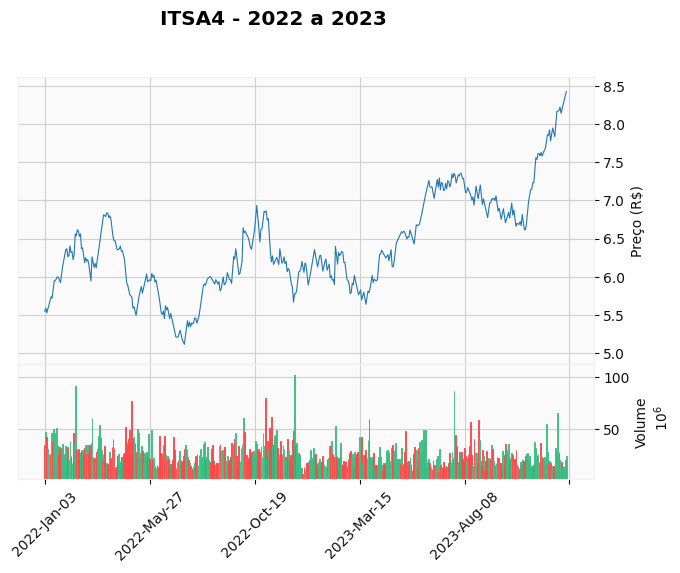

In [ ]:
import yfinance as yf
import mplfinance as mpf

# Vamos usar o DataFrame 'itsa4' que já temos
# Caso não o tenha, rode novamente:
itsa4 = yf.download('ITSA4.SA', start='2022-01-01', end='2023-12-31')

# Observando a estrutura do DataFrame, note que as colunas podem estar em MultiIndex
print(itsa4.info())
# Tratando o MultiIndex
if isinstance(itsa4.columns, pd.MultiIndex):
    print("\nMultiIndex detectado. Corrigindo as colunas...")
    itsa4.columns = itsa4.columns.get_level_values(0)


# A função mpf.plot() é a principal da biblioteca.
# Por padrão, ela já cria um gráfico de linha para o preço e um painel separado para o volume.
mpf.plot(itsa4, 
         type='line', 
         title='ITSA4 - 2022 a 2023', 
         ylabel='Preço (R$)',
         volume=True, 
         ylabel_lower='Volume',
         style='yahoo')


A grande vantagem do `mplfinance` é a facilidade para criar gráficos de candlestick. Basta mudar o argumento `type` para `'candle'`. Vamos visualizar apenas os últimos 60 dias de pregão para que os candles fiquem mais visíveis.

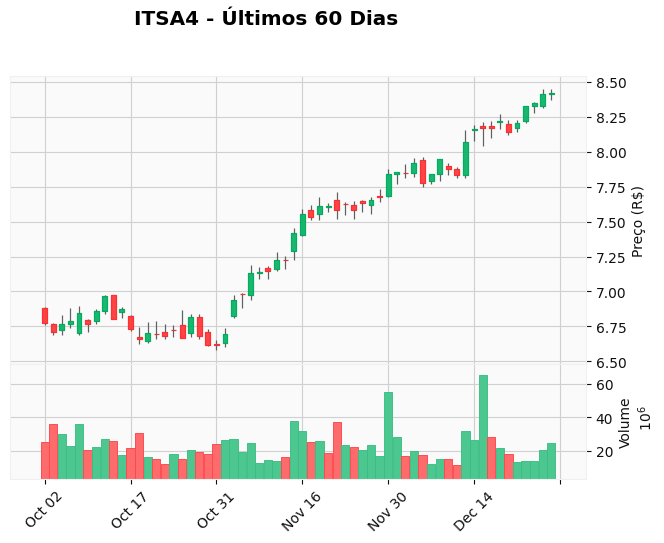

In [ ]:
# Pegando os últimos 60 dias de dados do nosso DataFrame
itsa4_recente = itsa4.tail(60)

# Criando o gráfico de candlestick
mpf.plot(itsa4_recente, 
         type='candle', 
         title='ITSA4 - Últimos 60 Dias', 
         ylabel='Preço (R$)',
         volume=True, 
         ylabel_lower='Volume',
         style='yahoo')

## **3.5 Juntar Múltiplas Séries Temporais**

Na maioria das vezes, especialmente em análise de portfólios, precisamos comparar múltiplos ativos. A melhor forma de fazer isso é ter todas as séries de preços em um único DataFrame, com as datas perfeitamente alinhadas.

No Pandas, a função `pd.concat()` é ideal para isso. Ela "cola" as séries de dados lado a lado (como colunas), usando o índice de datas para garantir que os preços do "dia X" de um ativo fiquem na mesma linha do "dia X" dos outros.

In [ ]:
import yfinance as yf
import pandas as pd

# Definir período
start_date = '2023-01-01'
end_date = '2023-12-31'

# 1. Baixar dados do PETR4 e selecionar o 'Adj Close'
# .rename() é importante para sabermos qual coluna é qual
# Nota: Se 'Adj Close' der erro, tente usar 'Close'
petr4 = yf.download('PETR4.SA', start=start_date, end=end_date)['Adj Close'].rename('PETR4')

# 2. Baixar dados do BBDC4 e selecionar o 'Adj Close'
bbdc4 = yf.download('BBDC4.SA', start=start_date, end=end_date)['Adj Close'].rename('BBDC4')

# 3. Baixar dados do IBOV e selecionar o 'Adj Close'
ibov = yf.download('^BVSP', start=start_date, end=end_date)['Adj Close'].rename('IBOV')

# 4. Juntar todas as Series em um único DataFrame
# axis=1 significa "juntar como colunas"
# O Pandas alinha automaticamente pelas datas (o índice)
portfolio = pd.concat([petr4, bbdc4, ibov], axis=1)

# 5. Remover dias em que algum ativo não teve negociação (linhas com NA)
portfolio_limpo = portfolio.dropna()

print("--- DataFrame Combinado (Início) ---")
print(portfolio_limpo.head())

print("\n--- DataFrame Combinado (Fim) ---")
print(portfolio_limpo.tail())

In [ ]:
import yfinance as yf
import pandas as pd

# --- Passo 1: Baixar os dados de cada ativo separadamente ---
# (Para este exemplo, vamos pegar dados mensais para simplificar a visualização)
petr4 = yf.download('PETR4.SA', start='2022-01-01', end='2023-12-31', interval='1mo')
bbdc4 = yf.download('BBDC4.SA', start='2022-01-01', end='2023-12-31', interval='1mo')
ibov = yf.download('^BVSP', start='2022-01-01', end='2023-12-31', interval='1mo')


# --- Passo 2: Selecionar a coluna de interesse de cada ativo (ex: 'Adj Close') ---
petr4_adj = petr4['Adj Close']
bbdc4_adj = bbdc4['Adj Close']
ibov_adj = ibov['Adj Close']


# --- Passo 3: Usar pd.concat para juntar as séries em um único DataFrame ---
# Criamos uma lista com as Series que queremos juntar
lista_de_series = [petr4_adj, bbdc4_adj, ibov_adj]

# axis=1 significa que queremos "colar" as séries como colunas, lado a lado
portfolio = pd.concat(lista_de_series, axis=1)


# --- Passo 4: Renomear as colunas para facilitar a identificação ---
portfolio.columns = ['PETR4', 'BBDC4', 'IBOV']


# --- Passo 5: Visualizar o resultado ---
print("--- DataFrame Combinado ---")
print(portfolio.head())